In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
import time
import datetime
import os

from networks import SiameseNet, EmbeddingNet
from datasets import SiameseTrainDataset, SiameseTestDataset
from losses import ContrastiveLoss
import matplotlib.pyplot as plt

## Args

In [2]:
# Model Configuration 
batch_size = 16
lr = 1e-5
n_epochs = 40
crop_size = 3*256

# Paths
train_data_path = '../../76_server/patch_2304/train/'
test_data_path = '../../76_server/patch_2304/val/'
save_path = '../models/'

## Model / Optimizer/ DataLoader 

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 2'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embed_net = EmbeddingNet().to(device)
model = SiameseNet(embed_net).to(device)

In [4]:
transform = transforms.Compose([
                    transforms.CenterCrop((crop_size, crop_size)),
                    transforms.Resize((256, 256)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))])

train_d_folder = ImageFolder(root=train_data_path, transform=transform)
test_d_folder = ImageFolder(root=test_data_path, transform=transform)
train_d_set = SiameseTrainDataset(train_d_folder)
# test_d_set = SiameseTestDataset(test_d_folder)

# Set Loader 
train_loader = DataLoader(train_d_set, 
                          batch_size=batch_size,
                          shuffle=False,
                          num_workers=32)
test_loader = DataLoader(test_d_folder, 
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=32)

# Training and Validation

* Total number of data to train - 128265
* Total number of data to train - 31079

In [5]:
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(0.5, 0.99))
criterion = ContrastiveLoss(margin=2.0)

In [6]:
def plot_embeddings(embeddings, epoch, xlim=None, ylim=None):
    plt.figure(figsize=(7,7))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

    for i, k in enumerate(distances.keys()):
        embeds = np.asarray(embeddings[k])
        plt.scatter(embeds[:, 0], embeds[:, 1], alpha=0.5, color=colors[i])
        plt.title('@ %d epoch' %  (epoch))
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])

Elapsed [0:00:43.541826]	Epoch [1/40]	Iters [200/8017]	Loss [0.6987]
Elapsed [0:01:15.346802]	Epoch [1/40]	Iters [400/8017]	Loss [0.4754]
Elapsed [0:01:45.263022]	Epoch [1/40]	Iters [600/8017]	Loss [0.3307]
Elapsed [0:02:16.987285]	Epoch [1/40]	Iters [800/8017]	Loss [0.3850]
Elapsed [0:02:49.666798]	Epoch [1/40]	Iters [1000/8017]	Loss [0.4066]
Elapsed [0:03:32.769486]	Epoch [1/40]	Iters [1200/8017]	Loss [0.4866]
Elapsed [0:04:12.687317]	Epoch [1/40]	Iters [1400/8017]	Loss [0.2828]
Elapsed [0:04:49.310722]	Epoch [1/40]	Iters [1600/8017]	Loss [0.5632]
Elapsed [0:05:26.744558]	Epoch [1/40]	Iters [1800/8017]	Loss [0.7629]
Elapsed [0:06:07.001566]	Epoch [1/40]	Iters [2000/8017]	Loss [0.5499]
Elapsed [0:06:45.806006]	Epoch [1/40]	Iters [2200/8017]	Loss [0.2759]
Elapsed [0:07:25.369560]	Epoch [1/40]	Iters [2400/8017]	Loss [0.5536]
Elapsed [0:08:01.455714]	Epoch [1/40]	Iters [2600/8017]	Loss [0.3705]
Elapsed [0:08:39.309986]	Epoch [1/40]	Iters [2800/8017]	Loss [0.3074]
Elapsed [0:09:12.083699]

Elapsed [0:23:17.554257]	Epoch [3/40]	Iters [7600/8017]	Loss [0.4764]
Elapsed [0:23:48.070837]	Epoch [3/40]	Iters [7800/8017]	Loss [0.0125]
Elapsed [0:24:18.155981]	Epoch [3/40]	Iters [8000/8017]	Loss [0.3543]
==> Validation plot @3-epoch
Elapsed [0:00:43.392085]	Epoch [4/40]	Iters [200/8017]	Loss [0.6363]
Elapsed [0:01:20.401067]	Epoch [4/40]	Iters [400/8017]	Loss [0.2678]
Elapsed [0:02:10.438834]	Epoch [4/40]	Iters [600/8017]	Loss [0.3003]
Elapsed [0:02:43.230839]	Epoch [4/40]	Iters [800/8017]	Loss [0.2506]
Elapsed [0:03:19.419863]	Epoch [4/40]	Iters [1000/8017]	Loss [0.4180]
Elapsed [0:03:51.424021]	Epoch [4/40]	Iters [1200/8017]	Loss [0.3547]
Elapsed [0:04:22.096807]	Epoch [4/40]	Iters [1400/8017]	Loss [0.2097]
Elapsed [0:04:53.945324]	Epoch [4/40]	Iters [1600/8017]	Loss [0.4952]
Elapsed [0:05:28.675398]	Epoch [4/40]	Iters [1800/8017]	Loss [0.5830]
Elapsed [0:06:00.489318]	Epoch [4/40]	Iters [2000/8017]	Loss [0.3430]
Elapsed [0:06:32.496237]	Epoch [4/40]	Iters [2200/8017]	Loss [0.1

Elapsed [0:19:37.095194]	Epoch [6/40]	Iters [6800/8017]	Loss [0.1302]
Elapsed [0:20:10.205895]	Epoch [6/40]	Iters [7000/8017]	Loss [0.2282]
Elapsed [0:20:40.161362]	Epoch [6/40]	Iters [7200/8017]	Loss [0.1109]
Elapsed [0:21:13.150537]	Epoch [6/40]	Iters [7400/8017]	Loss [0.0452]
Elapsed [0:21:44.189574]	Epoch [6/40]	Iters [7600/8017]	Loss [0.2194]
Elapsed [0:22:15.579154]	Epoch [6/40]	Iters [7800/8017]	Loss [0.0168]
Elapsed [0:22:46.139320]	Epoch [6/40]	Iters [8000/8017]	Loss [0.1016]
==> Validation plot @6-epoch
Elapsed [0:00:36.955893]	Epoch [7/40]	Iters [200/8017]	Loss [0.3926]
Elapsed [0:01:08.952514]	Epoch [7/40]	Iters [400/8017]	Loss [0.1968]
Elapsed [0:01:46.460264]	Epoch [7/40]	Iters [600/8017]	Loss [0.2108]
Elapsed [0:02:13.512701]	Epoch [7/40]	Iters [800/8017]	Loss [0.2141]
Elapsed [0:02:43.152699]	Epoch [7/40]	Iters [1000/8017]	Loss [0.3185]
Elapsed [0:03:11.253400]	Epoch [7/40]	Iters [1200/8017]	Loss [0.2028]
Elapsed [0:03:43.402652]	Epoch [7/40]	Iters [1400/8017]	Loss [0.2

Elapsed [0:16:37.061979]	Epoch [9/40]	Iters [6000/8017]	Loss [0.0446]
Elapsed [0:17:10.912104]	Epoch [9/40]	Iters [6200/8017]	Loss [0.0761]
Elapsed [0:17:43.305084]	Epoch [9/40]	Iters [6400/8017]	Loss [0.1589]
Elapsed [0:18:19.419590]	Epoch [9/40]	Iters [6600/8017]	Loss [0.4365]
Elapsed [0:18:55.584233]	Epoch [9/40]	Iters [6800/8017]	Loss [0.0590]
Elapsed [0:19:27.759006]	Epoch [9/40]	Iters [7000/8017]	Loss [0.1703]
Elapsed [0:19:59.535187]	Epoch [9/40]	Iters [7200/8017]	Loss [0.0856]
Elapsed [0:20:32.841502]	Epoch [9/40]	Iters [7400/8017]	Loss [0.0320]
Elapsed [0:21:05.181505]	Epoch [9/40]	Iters [7600/8017]	Loss [0.1444]
Elapsed [0:21:32.798551]	Epoch [9/40]	Iters [7800/8017]	Loss [0.0276]
Elapsed [0:22:04.486907]	Epoch [9/40]	Iters [8000/8017]	Loss [0.1290]
==> Validation plot @9-epoch
Elapsed [0:00:35.651049]	Epoch [10/40]	Iters [200/8017]	Loss [0.3748]
Elapsed [0:01:05.249581]	Epoch [10/40]	Iters [400/8017]	Loss [0.1304]
Elapsed [0:01:35.437613]	Epoch [10/40]	Iters [600/8017]	Loss 

Elapsed [0:16:45.844255]	Epoch [12/40]	Iters [5000/8017]	Loss [0.0401]
Elapsed [0:17:15.958827]	Epoch [12/40]	Iters [5200/8017]	Loss [0.0312]
Elapsed [0:17:46.479852]	Epoch [12/40]	Iters [5400/8017]	Loss [0.1272]
Elapsed [0:18:15.862186]	Epoch [12/40]	Iters [5600/8017]	Loss [0.1592]
Elapsed [0:18:50.942230]	Epoch [12/40]	Iters [5800/8017]	Loss [0.0237]
Elapsed [0:19:21.166199]	Epoch [12/40]	Iters [6000/8017]	Loss [0.0148]
Elapsed [0:19:51.568617]	Epoch [12/40]	Iters [6200/8017]	Loss [0.0498]
Elapsed [0:20:23.713724]	Epoch [12/40]	Iters [6400/8017]	Loss [0.0936]
Elapsed [0:20:54.528257]	Epoch [12/40]	Iters [6600/8017]	Loss [0.3324]
Elapsed [0:21:25.319008]	Epoch [12/40]	Iters [6800/8017]	Loss [0.0373]
Elapsed [0:21:55.804842]	Epoch [12/40]	Iters [7000/8017]	Loss [0.1609]
Elapsed [0:22:29.304565]	Epoch [12/40]	Iters [7200/8017]	Loss [0.0605]
Elapsed [0:22:57.026180]	Epoch [12/40]	Iters [7400/8017]	Loss [0.0322]
Elapsed [0:23:29.217777]	Epoch [12/40]	Iters [7600/8017]	Loss [0.0624]
Elapse

Elapsed [0:11:24.785727]	Epoch [15/40]	Iters [4000/8017]	Loss [0.0331]
Elapsed [0:11:58.525555]	Epoch [15/40]	Iters [4200/8017]	Loss [0.0989]
Elapsed [0:12:37.196204]	Epoch [15/40]	Iters [4400/8017]	Loss [0.2389]
Elapsed [0:13:12.177619]	Epoch [15/40]	Iters [4600/8017]	Loss [0.0535]
Elapsed [0:13:43.123184]	Epoch [15/40]	Iters [4800/8017]	Loss [0.0298]
Elapsed [0:14:14.084799]	Epoch [15/40]	Iters [5000/8017]	Loss [0.0297]
Elapsed [0:14:42.918198]	Epoch [15/40]	Iters [5200/8017]	Loss [0.0335]
Elapsed [0:15:07.527150]	Epoch [15/40]	Iters [5400/8017]	Loss [0.0923]
Elapsed [0:15:36.238022]	Epoch [15/40]	Iters [5600/8017]	Loss [0.1525]
Elapsed [0:16:06.234915]	Epoch [15/40]	Iters [5800/8017]	Loss [0.0184]
Elapsed [0:16:33.578310]	Epoch [15/40]	Iters [6000/8017]	Loss [0.0116]
Elapsed [0:17:02.043101]	Epoch [15/40]	Iters [6200/8017]	Loss [0.0486]
Elapsed [0:17:30.851387]	Epoch [15/40]	Iters [6400/8017]	Loss [0.0524]
Elapsed [0:17:57.851353]	Epoch [15/40]	Iters [6600/8017]	Loss [0.2242]
Elapse

Elapsed [0:08:23.847779]	Epoch [18/40]	Iters [3000/8017]	Loss [0.0543]
Elapsed [0:08:54.231077]	Epoch [18/40]	Iters [3200/8017]	Loss [0.0894]
Elapsed [0:09:27.978054]	Epoch [18/40]	Iters [3400/8017]	Loss [0.1024]
Elapsed [0:10:01.447011]	Epoch [18/40]	Iters [3600/8017]	Loss [0.0940]
Elapsed [0:10:32.977810]	Epoch [18/40]	Iters [3800/8017]	Loss [0.0368]
Elapsed [0:11:03.590379]	Epoch [18/40]	Iters [4000/8017]	Loss [0.0286]
Elapsed [0:11:36.351389]	Epoch [18/40]	Iters [4200/8017]	Loss [0.0833]
Elapsed [0:12:05.273618]	Epoch [18/40]	Iters [4400/8017]	Loss [0.1899]
Elapsed [0:12:34.659395]	Epoch [18/40]	Iters [4600/8017]	Loss [0.0506]
Elapsed [0:13:06.858889]	Epoch [18/40]	Iters [4800/8017]	Loss [0.0272]
Elapsed [0:13:36.193373]	Epoch [18/40]	Iters [5000/8017]	Loss [0.0228]
Elapsed [0:14:07.271053]	Epoch [18/40]	Iters [5200/8017]	Loss [0.0338]
Elapsed [0:14:41.309261]	Epoch [18/40]	Iters [5400/8017]	Loss [0.0619]
Elapsed [0:15:11.544572]	Epoch [18/40]	Iters [5600/8017]	Loss [0.1147]
Elapse

Elapsed [0:08:51.753624]	Epoch [21/40]	Iters [2000/8017]	Loss [0.0739]
Elapsed [0:09:42.202915]	Epoch [21/40]	Iters [2200/8017]	Loss [0.0296]
Elapsed [0:10:36.172647]	Epoch [21/40]	Iters [2400/8017]	Loss [0.0914]
Elapsed [0:11:31.872654]	Epoch [21/40]	Iters [2600/8017]	Loss [0.0474]
Elapsed [0:12:13.652275]	Epoch [21/40]	Iters [2800/8017]	Loss [0.0299]
Elapsed [0:12:58.653976]	Epoch [21/40]	Iters [3000/8017]	Loss [0.0543]
Elapsed [0:13:41.888496]	Epoch [21/40]	Iters [3200/8017]	Loss [0.0825]
Elapsed [0:14:32.847685]	Epoch [21/40]	Iters [3400/8017]	Loss [0.0894]
Elapsed [0:15:12.085399]	Epoch [21/40]	Iters [3600/8017]	Loss [0.0756]
Elapsed [0:15:54.352814]	Epoch [21/40]	Iters [3800/8017]	Loss [0.0272]
Elapsed [0:16:35.927310]	Epoch [21/40]	Iters [4000/8017]	Loss [0.0268]
Elapsed [0:17:24.212843]	Epoch [21/40]	Iters [4200/8017]	Loss [0.0741]
Elapsed [0:18:00.418097]	Epoch [21/40]	Iters [4400/8017]	Loss [0.1619]
Elapsed [0:18:42.485184]	Epoch [21/40]	Iters [4600/8017]	Loss [0.0486]
Elapse

/home/kangyeol/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Elapsed [0:00:52.362952]	Epoch [22/40]	Iters [200/8017]	Loss [0.2343]
Elapsed [0:01:39.368731]	Epoch [22/40]	Iters [400/8017]	Loss [0.0362]
Elapsed [0:02:25.449113]	Epoch [22/40]	Iters [600/8017]	Loss [0.2157]
Elapsed [0:03:19.702262]	Epoch [22/40]	Iters [800/8017]	Loss [0.0676]
Elapsed [0:04:19.979172]	Epoch [22/40]	Iters [1000/8017]	Loss [0.0488]
Elapsed [0:05:11.432849]	Epoch [22/40]	Iters [1200/8017]	Loss [0.0693]
Elapsed [0:06:04.426105]	Epoch [22/40]	Iters [1400/8017]	Loss [0.0922]
Elapsed [0:06:50.041676]	Epoch [22/40]	Iters [1600/8017]	Loss [0.1687]
Elapsed [0:07:33.785565]	Epoch [22/40]	Iters [1800/8017]	Loss [0.0973]
Elapsed [0:08:16.584332]	Epoch [22/40]	Iters [2000/8017]	Loss [0.0649]
Elapsed [0:08:58.189066]	Epoch [22/40]	Iters [2200/8017]	Loss [0.0265]
Elapsed [0:09:47.918728]	Epoch [22/40]	Iters [2400/8017]	Loss [0.0936]
Elapsed [0:10:39.658028]	Epoch [22/40]	Iters [2600/8017]	Loss [0.0422]
Elapsed [0:11:31.570729]	Epoch [22/40]	Iters [2800/8017]	Loss [0.0257]
Elapsed [0

Elapsed [0:35:27.683849]	Epoch [24/40]	Iters [7200/8017]	Loss [0.0074]
Elapsed [0:36:23.842190]	Epoch [24/40]	Iters [7400/8017]	Loss [0.0164]
Elapsed [0:37:19.255771]	Epoch [24/40]	Iters [7600/8017]	Loss [0.0094]
Elapsed [0:38:15.748757]	Epoch [24/40]	Iters [7800/8017]	Loss [0.0009]
Elapsed [0:39:10.128248]	Epoch [24/40]	Iters [8000/8017]	Loss [0.0209]
==> Validation plot @24-epoch
Elapsed [0:01:06.707743]	Epoch [25/40]	Iters [200/8017]	Loss [0.1793]
Elapsed [0:02:00.143971]	Epoch [25/40]	Iters [400/8017]	Loss [0.0281]
Elapsed [0:02:50.507851]	Epoch [25/40]	Iters [600/8017]	Loss [0.2254]
Elapsed [0:03:44.847819]	Epoch [25/40]	Iters [800/8017]	Loss [0.0471]
Elapsed [0:04:47.028985]	Epoch [25/40]	Iters [1000/8017]	Loss [0.0371]
Elapsed [0:05:37.540753]	Epoch [25/40]	Iters [1200/8017]	Loss [0.0586]
Elapsed [0:06:29.520380]	Epoch [25/40]	Iters [1400/8017]	Loss [0.0664]
Elapsed [0:07:19.196065]	Epoch [25/40]	Iters [1600/8017]	Loss [0.1174]
Elapsed [0:08:16.986995]	Epoch [25/40]	Iters [1800/

Elapsed [0:31:41.366716]	Epoch [27/40]	Iters [6200/8017]	Loss [0.0495]
Elapsed [0:33:10.769437]	Epoch [27/40]	Iters [6400/8017]	Loss [0.0079]
Elapsed [0:34:35.727756]	Epoch [27/40]	Iters [6600/8017]	Loss [0.0544]
Elapsed [0:35:57.595323]	Epoch [27/40]	Iters [6800/8017]	Loss [0.0088]
Elapsed [0:37:13.997714]	Epoch [27/40]	Iters [7000/8017]	Loss [0.0139]
Elapsed [0:38:42.912392]	Epoch [27/40]	Iters [7200/8017]	Loss [0.0069]
Elapsed [0:39:47.261910]	Epoch [27/40]	Iters [7400/8017]	Loss [0.0149]
Elapsed [0:40:44.222962]	Epoch [27/40]	Iters [7600/8017]	Loss [0.0125]
Elapsed [0:41:34.408009]	Epoch [27/40]	Iters [7800/8017]	Loss [0.0015]
Elapsed [0:42:23.796648]	Epoch [27/40]	Iters [8000/8017]	Loss [0.0085]
==> Validation plot @27-epoch
Elapsed [0:00:57.353600]	Epoch [28/40]	Iters [200/8017]	Loss [0.1792]
Elapsed [0:01:47.357923]	Epoch [28/40]	Iters [400/8017]	Loss [0.0169]
Elapsed [0:02:40.204237]	Epoch [28/40]	Iters [600/8017]	Loss [0.2064]
Elapsed [0:03:47.425397]	Epoch [28/40]	Iters [800/

Elapsed [0:27:39.272893]	Epoch [30/40]	Iters [5200/8017]	Loss [0.0146]
Elapsed [0:28:27.630113]	Epoch [30/40]	Iters [5400/8017]	Loss [0.0304]
Elapsed [0:29:25.659080]	Epoch [30/40]	Iters [5600/8017]	Loss [0.0377]
Elapsed [0:30:23.811160]	Epoch [30/40]	Iters [5800/8017]	Loss [0.0195]
Elapsed [0:31:25.528669]	Epoch [30/40]	Iters [6000/8017]	Loss [0.0034]
Elapsed [0:32:26.260837]	Epoch [30/40]	Iters [6200/8017]	Loss [0.0782]
Elapsed [0:33:20.765156]	Epoch [30/40]	Iters [6400/8017]	Loss [0.0076]
Elapsed [0:34:23.627641]	Epoch [30/40]	Iters [6600/8017]	Loss [0.0334]
Elapsed [0:35:15.424827]	Epoch [30/40]	Iters [6800/8017]	Loss [0.0063]
Elapsed [0:36:08.273712]	Epoch [30/40]	Iters [7000/8017]	Loss [0.0059]
Elapsed [0:36:57.045314]	Epoch [30/40]	Iters [7200/8017]	Loss [0.0072]
Elapsed [0:38:02.619693]	Epoch [30/40]	Iters [7400/8017]	Loss [0.0143]
Elapsed [0:39:13.016147]	Epoch [30/40]	Iters [7600/8017]	Loss [0.0101]
Elapsed [0:40:27.708188]	Epoch [30/40]	Iters [7800/8017]	Loss [0.0007]
Elapse

Elapsed [0:21:25.537131]	Epoch [33/40]	Iters [4200/8017]	Loss [0.0353]
Elapsed [0:22:15.074982]	Epoch [33/40]	Iters [4400/8017]	Loss [0.0434]
Elapsed [0:23:18.302703]	Epoch [33/40]	Iters [4600/8017]	Loss [0.0148]
Elapsed [0:24:16.722240]	Epoch [33/40]	Iters [4800/8017]	Loss [0.0062]
Elapsed [0:25:13.571340]	Epoch [33/40]	Iters [5000/8017]	Loss [0.0044]
Elapsed [0:26:10.999097]	Epoch [33/40]	Iters [5200/8017]	Loss [0.0128]
Elapsed [0:27:29.505798]	Epoch [33/40]	Iters [5400/8017]	Loss [0.0265]
Elapsed [0:28:40.704564]	Epoch [33/40]	Iters [5600/8017]	Loss [0.0310]
Elapsed [0:29:53.528864]	Epoch [33/40]	Iters [5800/8017]	Loss [0.0119]
Elapsed [0:31:01.474267]	Epoch [33/40]	Iters [6000/8017]	Loss [0.0038]
Elapsed [0:32:24.986040]	Epoch [33/40]	Iters [6200/8017]	Loss [0.1257]
Elapsed [0:33:34.381379]	Epoch [33/40]	Iters [6400/8017]	Loss [0.0067]
Elapsed [0:34:48.205781]	Epoch [33/40]	Iters [6600/8017]	Loss [0.0434]
Elapsed [0:36:01.171755]	Epoch [33/40]	Iters [6800/8017]	Loss [0.0061]
Elapse

Elapsed [0:14:09.219937]	Epoch [36/40]	Iters [3200/8017]	Loss [0.0345]
Elapsed [0:15:09.910625]	Epoch [36/40]	Iters [3400/8017]	Loss [0.1068]
Elapsed [0:16:04.996221]	Epoch [36/40]	Iters [3600/8017]	Loss [0.0259]
Elapsed [0:16:57.785769]	Epoch [36/40]	Iters [3800/8017]	Loss [0.0077]
Elapsed [0:17:56.252533]	Epoch [36/40]	Iters [4000/8017]	Loss [0.0133]
Elapsed [0:19:05.120455]	Epoch [36/40]	Iters [4200/8017]	Loss [0.0414]
Elapsed [0:19:55.219348]	Epoch [36/40]	Iters [4400/8017]	Loss [0.0383]
Elapsed [0:20:45.431594]	Epoch [36/40]	Iters [4600/8017]	Loss [0.0119]
Elapsed [0:21:33.808057]	Epoch [36/40]	Iters [4800/8017]	Loss [0.0048]
Elapsed [0:22:28.365924]	Epoch [36/40]	Iters [5000/8017]	Loss [0.0047]
Elapsed [0:23:20.305269]	Epoch [36/40]	Iters [5200/8017]	Loss [0.0060]
Elapsed [0:24:16.281540]	Epoch [36/40]	Iters [5400/8017]	Loss [0.0329]
Elapsed [0:25:20.939871]	Epoch [36/40]	Iters [5600/8017]	Loss [0.0246]
Elapsed [0:26:31.879293]	Epoch [36/40]	Iters [5800/8017]	Loss [0.0201]
Elapse

Elapsed [0:10:44.561130]	Epoch [39/40]	Iters [2200/8017]	Loss [0.0046]
Elapsed [0:11:36.690542]	Epoch [39/40]	Iters [2400/8017]	Loss [0.0169]
Elapsed [0:12:31.762482]	Epoch [39/40]	Iters [2600/8017]	Loss [0.0020]
Elapsed [0:13:30.395842]	Epoch [39/40]	Iters [2800/8017]	Loss [0.0034]
Elapsed [0:14:23.406273]	Epoch [39/40]	Iters [3000/8017]	Loss [0.0028]
Elapsed [0:15:14.957130]	Epoch [39/40]	Iters [3200/8017]	Loss [0.0067]
Elapsed [0:16:08.841331]	Epoch [39/40]	Iters [3400/8017]	Loss [0.0880]
Elapsed [0:17:11.797298]	Epoch [39/40]	Iters [3600/8017]	Loss [0.0178]
Elapsed [0:18:09.519556]	Epoch [39/40]	Iters [3800/8017]	Loss [0.0033]
Elapsed [0:19:03.419196]	Epoch [39/40]	Iters [4000/8017]	Loss [0.0118]
Elapsed [0:19:52.782709]	Epoch [39/40]	Iters [4200/8017]	Loss [0.0563]
Elapsed [0:20:47.716257]	Epoch [39/40]	Iters [4400/8017]	Loss [0.0149]
Elapsed [0:21:39.049105]	Epoch [39/40]	Iters [4600/8017]	Loss [0.0103]
Elapsed [0:22:31.439489]	Epoch [39/40]	Iters [4800/8017]	Loss [0.0038]
Elapse

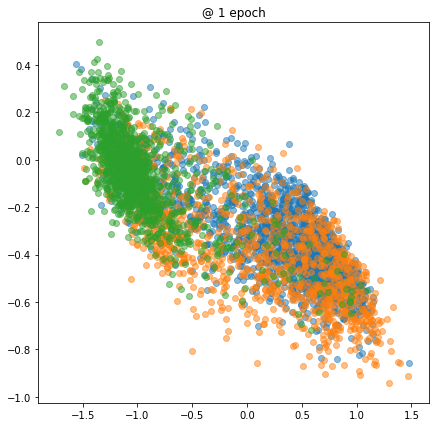

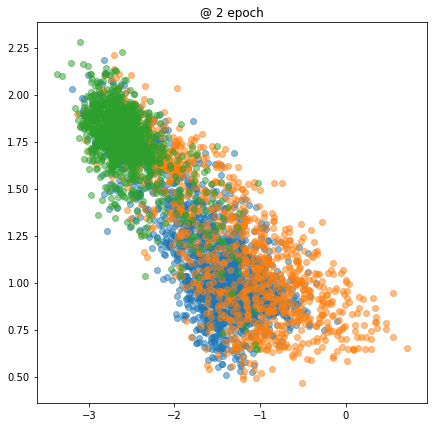

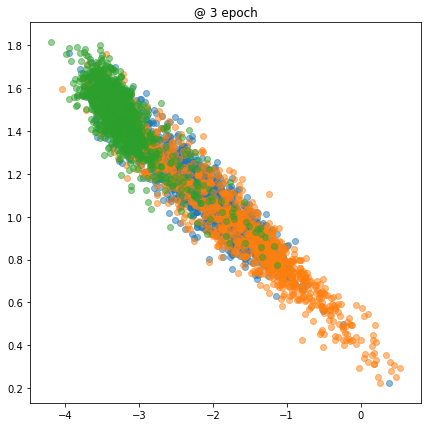

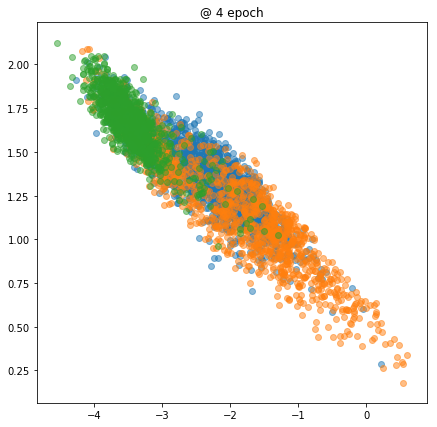

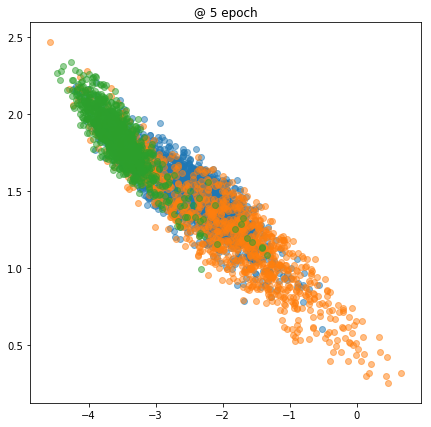

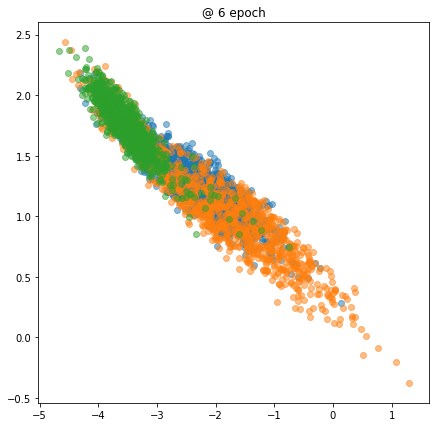

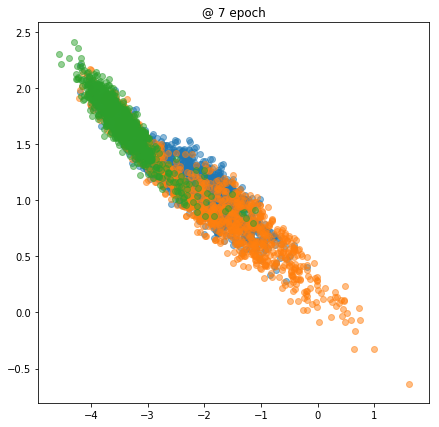

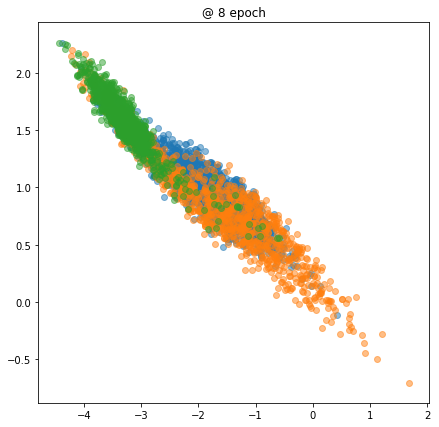

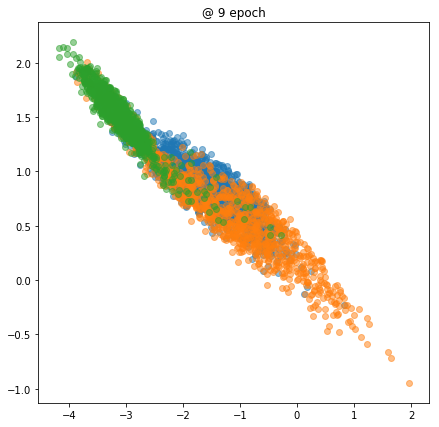

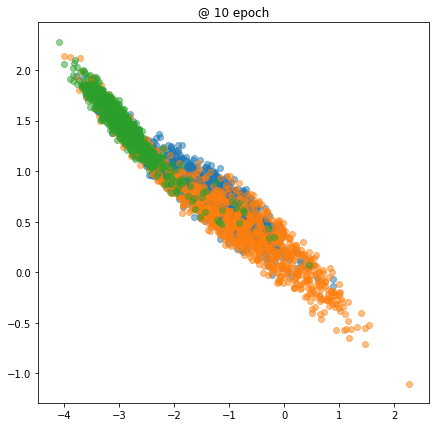

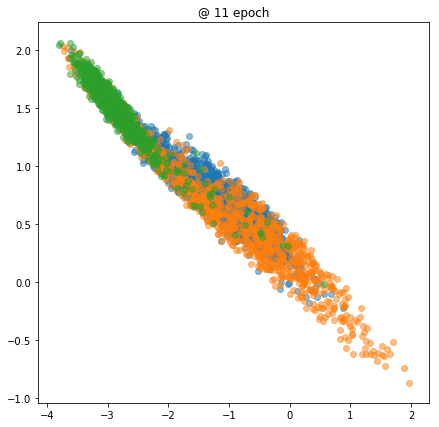

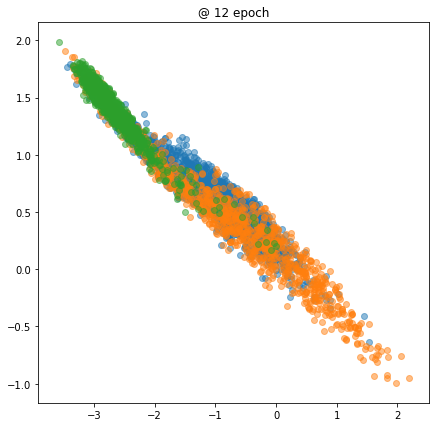

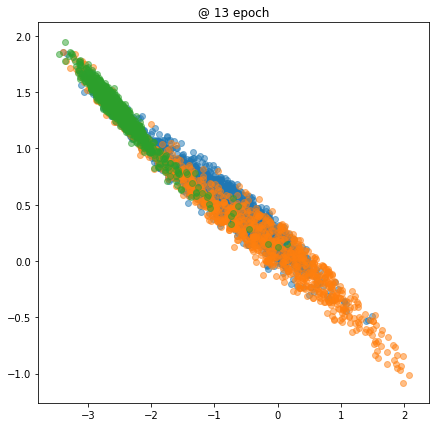

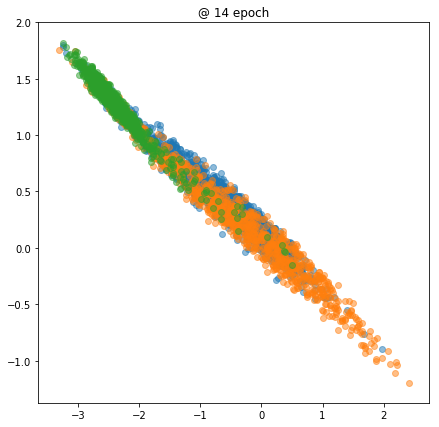

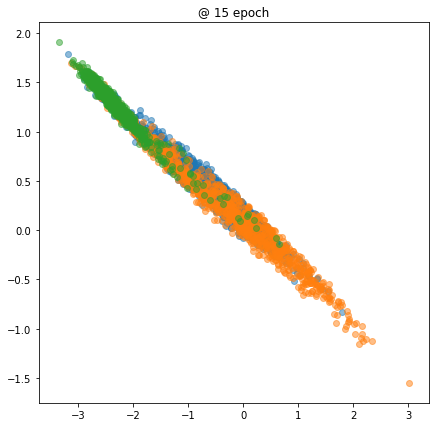

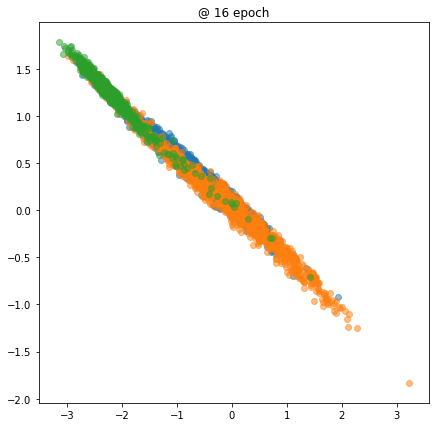

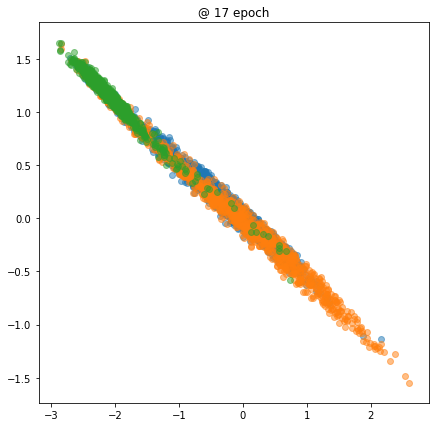

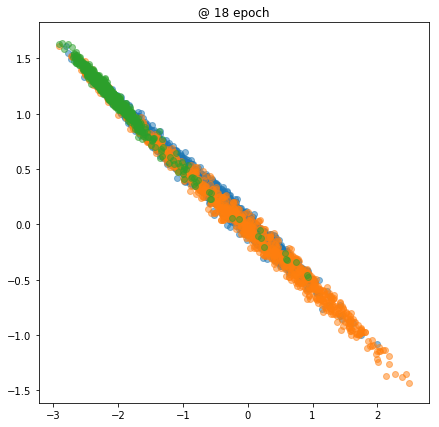

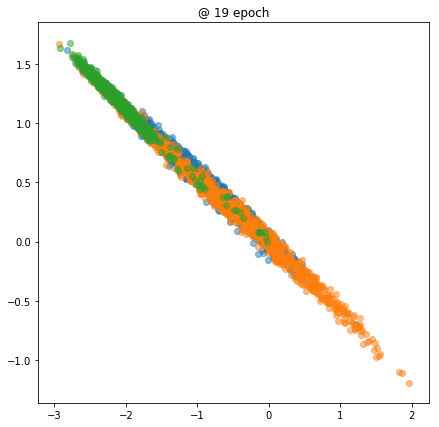

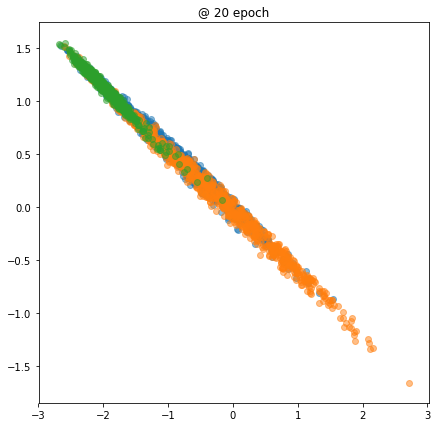

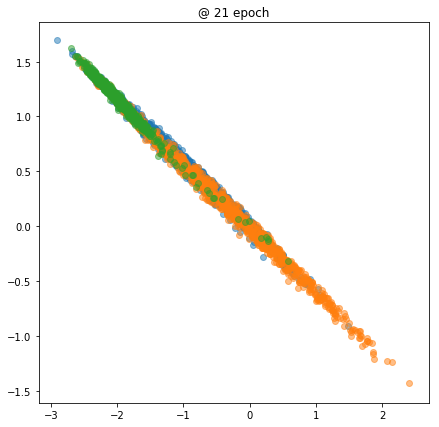

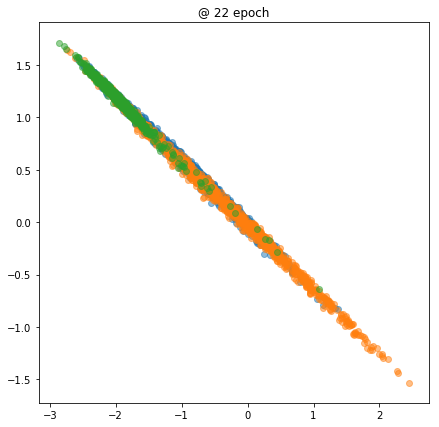

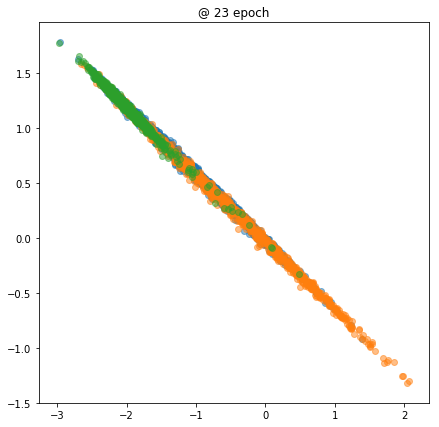

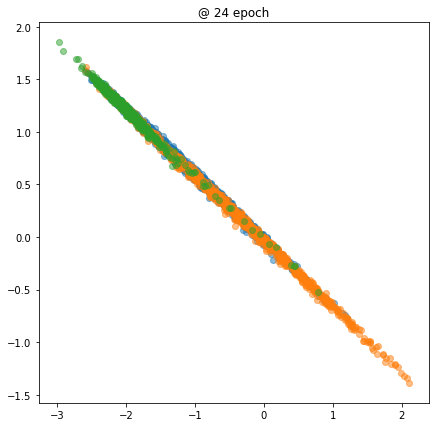

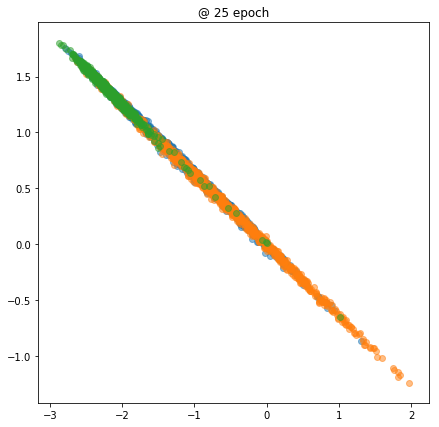

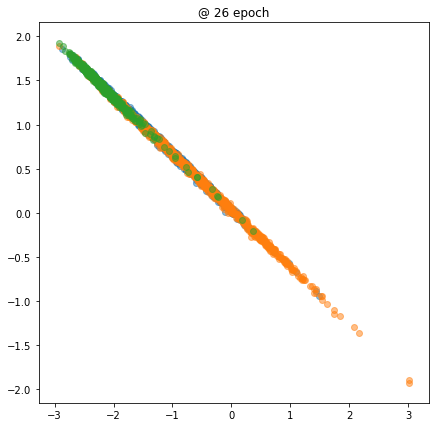

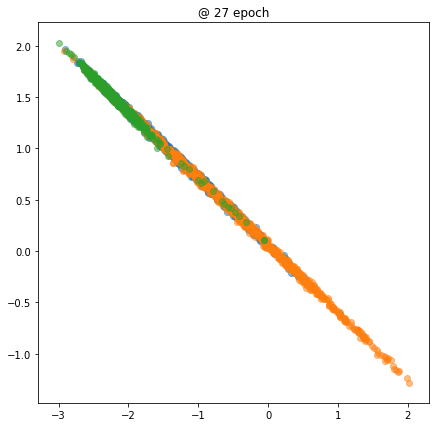

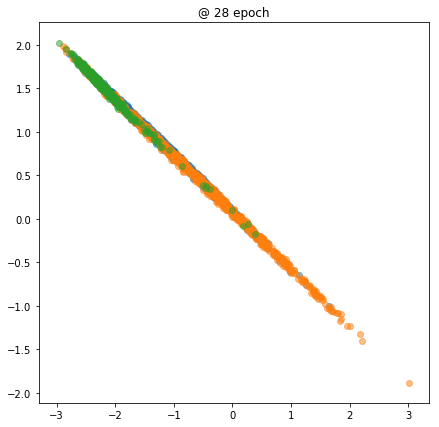

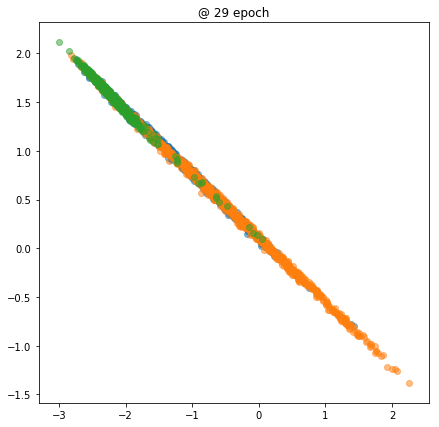

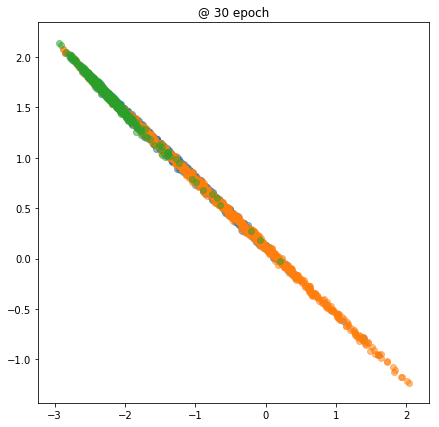

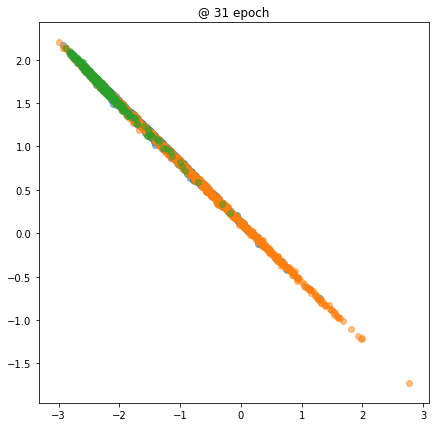

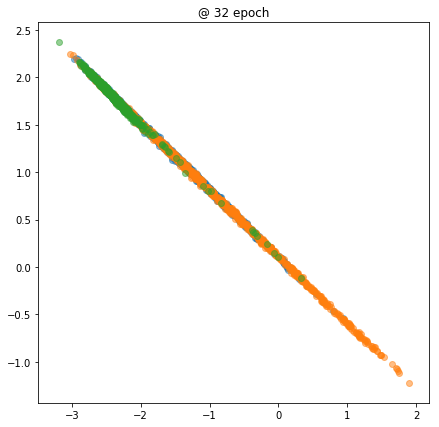

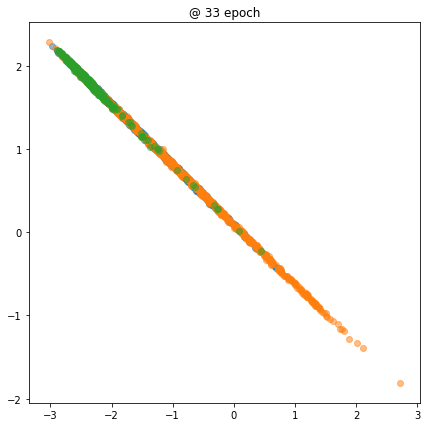

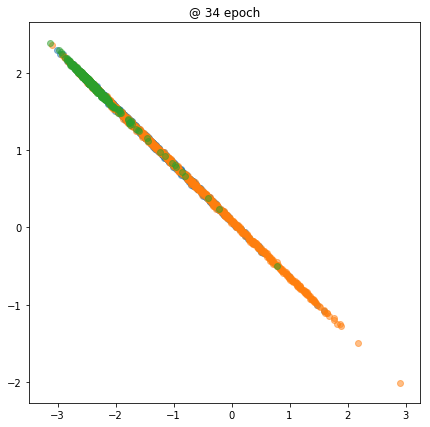

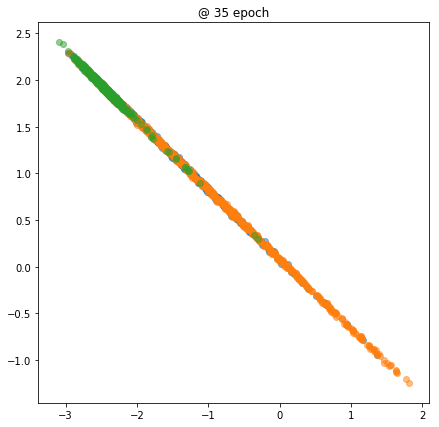

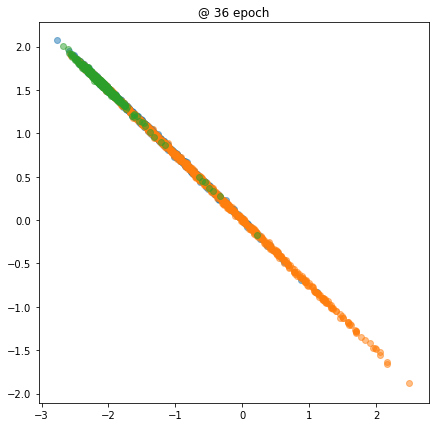

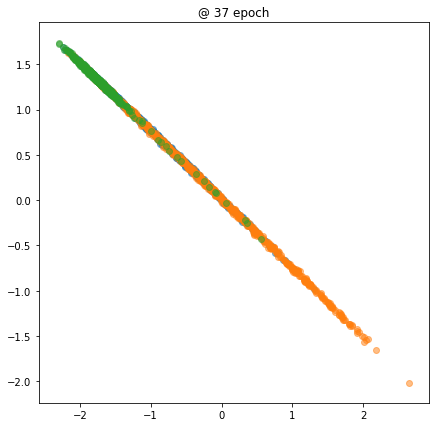

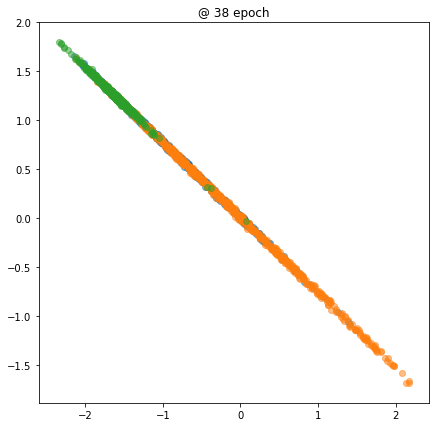

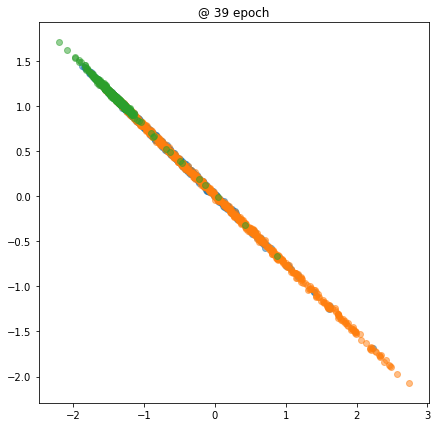

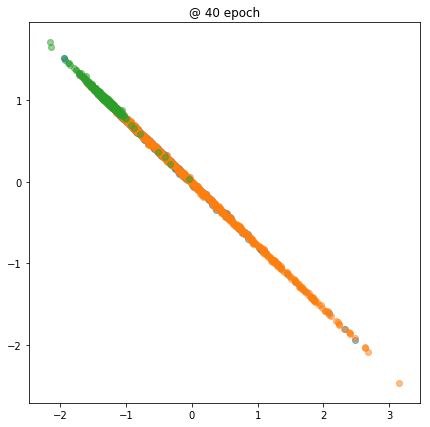

In [7]:
# Train One-epoch
for epoch in range(n_epochs):
    
    if not isinstance(model,  nn.DataParallel) and len(os.environ['CUDA_VISIBLE_DEVICES'].split(',')) >= 2:
        model = nn.DataParallel(model)
    model.train()
    start_t = time.time()
    for ii, var in enumerate(train_loader):

        # Pairs of images
        imgs_1, imgs_2 = var[0][0].to(device), var[0][1].to(device)
        # Positive or Not
        target = var[1].long().to(device)

        # Forwarding & Backwarding 
        f1, f2 = model(imgs_1, imgs_2)
        loss = criterion(f1, f2, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (ii+1) % 200 == 0:
            lap = time.time() - start_t
            elapsed = str(datetime.timedelta(seconds=lap))
            print('Elapsed [{}]\t'
                  'Epoch [{}/{}]\t'
                  'Iters [{}/{}]\t'
                  'Loss [{:.4f}]'.format(elapsed, epoch+1, n_epochs, (ii+1), len(train_loader), loss.item()))
#         if ii > 10:
#             break
    
    # Validate one-epoch
    if isinstance(model, nn.DataParallel):
        model = model.module
    model.eval()
    start_t = time.time()
    
    # Make storage for feature saving
    distances = {}
    distances['hp'] = []
    distances['normal'] = []
    distances['ta'] = []
    
    for jj, (image, label) in enumerate(test_loader):
    
        # Data loading
        image_var = image.to(device)
        label = label.long()

        # Forwarding and Feature saving
        features = model.get_embedding(image_var)
        features = features.cpu().detach().numpy()
        
        # Compute 
        distances['hp'].extend(features[np.where(label == 0)])
        distances['normal'].extend(features[np.where(label == 1)])
        distances['ta'].extend(features[np.where(label == 2)])

#         if (jj+1) % 20 == 0:
#             lap = time.time() - start_t
#             elapsed = str(datetime.timedelta(seconds=lap))
#             print('Elapsed [{}]\t'
#                   'Iters [{}/{}]\t'.format(elapsed, (jj+1), len(test_loader)))
        
        if jj > 250:
            break
        
    print('==> Validation plot @%d-epoch' % (epoch+1))
    plot_embeddings(embeddings=distances, epoch=(epoch+1))

## Save model

In [13]:
# # Save model
# if isinstance(model, nn.DataParallel):
#     ckpt = {
#         'epoch' : epoch,
#         'model_state_dict' : model.module.state_dict(),
#         'optimizer_state_dict' : optimizer.state_dict()}
# else:
#     ckpt = {
#         'epoch' : epoch,
#         'model_state_dict' : model.state_dict(),
#         'optimizer_state_dict' : optimizer.state_dict()}

# torch.save(ckpt, './models/40_basic_siam.pth')

## Load model

In [5]:
ckpt = torch.load('./models/40_basic_siam.pth')
model.load_state_dict(ckpt['model_state_dict'])
optimizer.load_state_dict(ckpt['optimizer_state_dict'])

if len(os.environ['CUDA_VISIBLE_DEVICES'].split(',')) >= 2:
    model = nn.DataParallel(model)

## Print out t-sne plot for features.

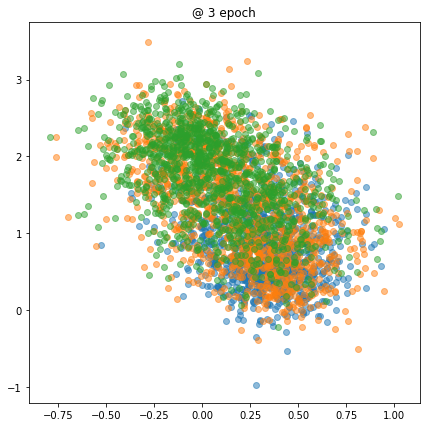

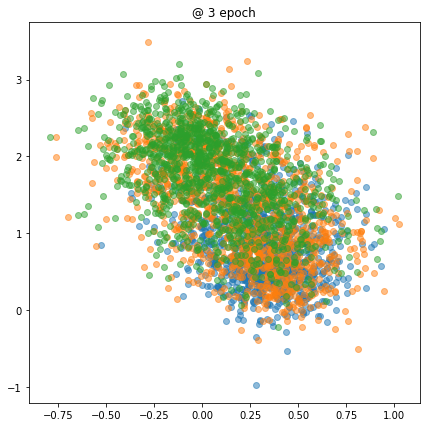

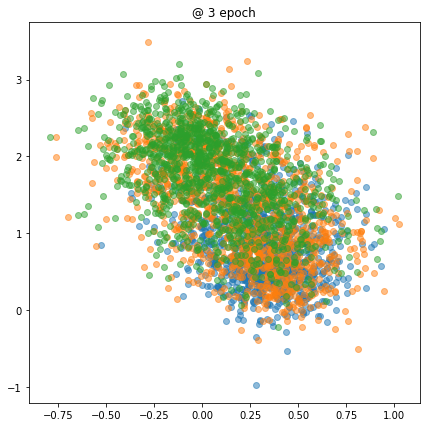

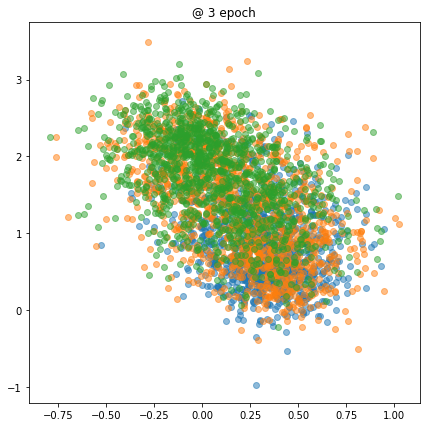

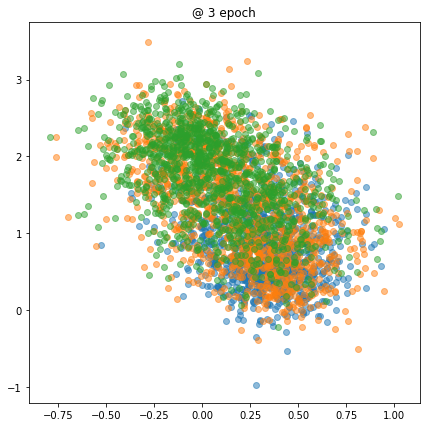

In [41]:
for kk in range(5):
    plot_embeddings(distances)

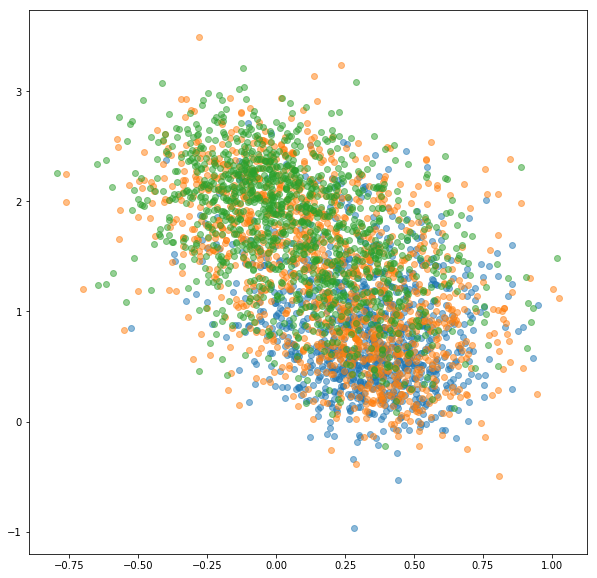

In [34]:
plot_embeddings(distances)